In [ ]:
# exp=setup(data=your_data,target='target_column')
# comapre_models()
# model=create_model('which_model')
# tuned_model=tune_model(model)

In [1]:
!pip install pycaret[full]

In [1]:
from pycaret.classification import *

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df=df[['Survived','Pclass','Sex','Age','Embarked','SibSp']]

In [6]:
df

,Survived,Pclass,Sex,Age,Embarked,SibSp
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0
...,...,...,...,...,...,...
886,0,2,male,27.0,S,0
887,1,1,female,19.0,S,0
888,0,3,female,NaN,S,1
889,1,1,male,26.0,C,0


In [7]:
exp= setup(data=df,target='Survived')

,Description,Value
0,session_id,6681
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 6)"
5,Missing Values,True
6,Numeric Features,1
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8154,0.8541,0.7000,0.8256,0.7527,0.6073,0.6170,0.0960
catboost,CatBoost Classifier,0.8138,0.8643,0.7000,0.8202,0.7506,0.6039,0.6128,0.7860
lightgbm,Light Gradient Boosting Machine,0.8122,0.8530,0.7320,0.7976,0.7576,0.6053,0.6123,0.2810
ada,Ada Boost Classifier,0.8027,0.8435,0.7320,0.7695,0.7489,0.5866,0.5885,0.1010
rf,Random Forest Classifier,0.7996,0.8299,0.7400,0.7625,0.7479,0.5820,0.5855,0.2470
lr,Logistic Regression,0.7930,0.8517,0.7000,0.7681,0.7308,0.5633,0.5665,0.8450
ridge,Ridge Classifier,0.7914,0.0000,0.6920,0.7694,0.7267,0.5589,0.5627,0.0100
lda,Linear Discriminant Analysis,0.7898,0.8514,0.6920,0.7662,0.7251,0.5558,0.5595,0.0120
xgboost,Extreme Gradient Boosting,0.7882,0.8365,0.7160,0.7513,0.7305,0.5566,0.5598,0.1330
et,Extra Trees Classifier,0.7804,0.7948,0.6840,0.7551,0.7135,0.5367,0.5425,0.1930


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6681, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [9]:
# Best model is Catboost Classifier #

In [10]:
model_catboost=create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.8542,0.6400,0.9412,0.7619,0.6492,0.6764
1,0.7937,0.7963,0.7600,0.7308,0.7451,0.5719,0.5722
2,0.7937,0.8405,0.7200,0.7500,0.7347,0.5660,0.5663
3,0.8065,0.8465,0.7200,0.7826,0.7500,0.5926,0.5939
4,0.8387,0.8784,0.8000,0.8000,0.8000,0.6649,0.6649
5,0.7581,0.8724,0.6400,0.7273,0.6809,0.4873,0.4899
6,0.8226,0.9108,0.7200,0.8182,0.7660,0.6240,0.6273
7,0.8226,0.8843,0.6400,0.8889,0.7442,0.6138,0.6332
8,0.8226,0.9086,0.6000,0.9375,0.7317,0.6085,0.6423
9,0.8387,0.8508,0.7600,0.8261,0.7917,0.6605,0.6620


In [11]:
model_lr=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8489,0.6800,0.8095,0.7391,0.5909,0.5965
1,0.7937,0.8532,0.7200,0.7500,0.7347,0.5660,0.5663
2,0.7460,0.8447,0.6800,0.6800,0.6800,0.4695,0.4695
3,0.8065,0.8508,0.7600,0.7600,0.7600,0.5978,0.5978
4,0.8226,0.8557,0.7600,0.7917,0.7755,0.6289,0.6293
5,0.7581,0.8086,0.6400,0.7273,0.6809,0.4873,0.4899
6,0.8065,0.8978,0.7200,0.7826,0.7500,0.5926,0.5939
7,0.8065,0.8324,0.7200,0.7826,0.7500,0.5926,0.5939
8,0.8226,0.8989,0.6400,0.8889,0.7442,0.6138,0.6332
9,0.7581,0.8259,0.6800,0.7083,0.6939,0.4940,0.4943


In [12]:
model_knn=create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7619,0.7500,0.4800,0.8571,0.6154,0.4622,0.5029
1,0.6667,0.7179,0.5600,0.5833,0.5714,0.2989,0.2991
2,0.7619,0.7953,0.6400,0.7273,0.6809,0.4922,0.4948
3,0.6774,0.7022,0.5200,0.6190,0.5652,0.3119,0.3149
4,0.6129,0.7211,0.4400,0.5238,0.4783,0.1743,0.1759
5,0.7097,0.7670,0.5600,0.6667,0.6087,0.3807,0.3843
6,0.8065,0.8427,0.7600,0.7600,0.7600,0.5978,0.5978
7,0.6774,0.7859,0.3600,0.6923,0.4737,0.2732,0.3035
8,0.7581,0.8486,0.4800,0.8571,0.6154,0.4587,0.4997
9,0.7903,0.7919,0.6800,0.7727,0.7234,0.5557,0.5586


In [13]:
print(model_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [14]:
print(model_catboost)

In [15]:
# Hyperparameters tuning for increasing performance. KNN metric

In [16]:
tuned_knn = tune_model(model_knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7302,0.6800,0.5600,0.7000,0.6222,0.4163,0.4226
1,0.6349,0.5937,0.5600,0.5385,0.5490,0.2426,0.2427
2,0.6825,0.7689,0.4800,0.6316,0.5455,0.3085,0.3153
3,0.7097,0.7189,0.5600,0.6667,0.6087,0.3807,0.3843
4,0.7581,0.8173,0.5600,0.7778,0.6512,0.4734,0.4884
5,0.7742,0.8514,0.6000,0.7895,0.6818,0.5118,0.5234
6,0.7419,0.7886,0.5600,0.7368,0.6364,0.4421,0.4521
7,0.7742,0.8227,0.6000,0.7895,0.6818,0.5118,0.5234
8,0.8387,0.8643,0.6800,0.8947,0.7727,0.6513,0.6660
9,0.7581,0.8254,0.6000,0.7500,0.6667,0.4804,0.4878


In [17]:
# 0.7384	0.7603	0.5142	0.7432	0.5997	0.4160	0.4361 --- before tuning
# 0.7720	0.7759	0.5847	0.7860	0.6605	0.4958	0.5141 --- after tuning


In [18]:
tuned_catboost = tune_model(model_catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8111,0.6000,0.8824,0.7143,0.5791,0.6033
1,0.7937,0.8005,0.7600,0.7308,0.7451,0.5719,0.5722
2,0.8413,0.8221,0.7200,0.8571,0.7826,0.6591,0.6653
3,0.7903,0.8216,0.6800,0.7727,0.7234,0.5557,0.5586
4,0.7742,0.8600,0.6800,0.7391,0.7083,0.5246,0.5259
5,0.7742,0.8227,0.6800,0.7391,0.7083,0.5246,0.5259
6,0.8226,0.9259,0.7600,0.7917,0.7755,0.6289,0.6293
7,0.8226,0.9005,0.6400,0.8889,0.7442,0.6138,0.6332
8,0.8226,0.8724,0.6000,0.9375,0.7317,0.6085,0.6423
9,0.8548,0.8665,0.7600,0.8636,0.8085,0.6924,0.6961


In [19]:
# 0.8249	0.8308	0.6678	0.8477	0.7441	0.6147	0.6267 ---before
# 0.8201	0.8325	0.6553	0.8467	0.7356	0.6034	0.6169 --- after

In [20]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=14, p=2,
                     weights='distance')


In [21]:
log_reg = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8489,0.6800,0.8095,0.7391,0.5909,0.5965
1,0.7937,0.8532,0.7200,0.7500,0.7347,0.5660,0.5663
2,0.7460,0.8447,0.6800,0.6800,0.6800,0.4695,0.4695
3,0.8065,0.8508,0.7600,0.7600,0.7600,0.5978,0.5978
4,0.8226,0.8557,0.7600,0.7917,0.7755,0.6289,0.6293
5,0.7581,0.8086,0.6400,0.7273,0.6809,0.4873,0.4899
6,0.8065,0.8978,0.7200,0.7826,0.7500,0.5926,0.5939
7,0.8065,0.8324,0.7200,0.7826,0.7500,0.5926,0.5939
8,0.8226,0.8989,0.6400,0.8889,0.7442,0.6138,0.6332
9,0.7581,0.8259,0.6800,0.7083,0.6939,0.4940,0.4943


In [22]:
print(log_reg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6681, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [23]:
tuned_log_reg = tune_model(log_reg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.8468,0.7200,0.8182,0.7660,0.6276,0.6309
1,0.8095,0.8542,0.7200,0.7826,0.7500,0.5966,0.5979
2,0.7460,0.8416,0.6800,0.6800,0.6800,0.4695,0.4695
3,0.8226,0.8562,0.7600,0.7917,0.7755,0.6289,0.6293
4,0.8226,0.8568,0.7600,0.7917,0.7755,0.6289,0.6293
5,0.7742,0.8032,0.6800,0.7391,0.7083,0.5246,0.5259
6,0.8226,0.9022,0.7600,0.7917,0.7755,0.6289,0.6293
7,0.8226,0.8324,0.7600,0.7917,0.7755,0.6289,0.6293
8,0.8226,0.8989,0.6400,0.8889,0.7442,0.6138,0.6332
9,0.7581,0.8216,0.6800,0.7083,0.6939,0.4940,0.4943


In [24]:
# Balancing dataset using PyCaret

In [25]:
telecom=pd.read_csv('telecom_churn.csv')

In [26]:
telecom.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [27]:
telecom.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [28]:
telecom=telecom[['voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']]

In [29]:
telecom.head()

,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<AxesSubplot:xlabel='churn', ylabel='count'>

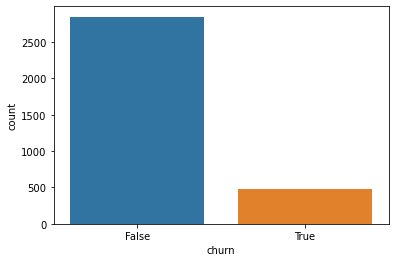

In [30]:
import seaborn as sns
sns.countplot(x='churn',data=telecom)

In [31]:
# Building PyCaret model without fixing the imbalance problem

In [32]:
exp= setup(data=telecom,target='churn')

,Description,Value
0,session_id,1000
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(3333, 16)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9147,0.8747,0.5421,0.8528,0.6602,0.6142,0.6363,2.4150
lightgbm,Light Gradient Boosting Machine,0.9108,0.8426,0.4999,0.8663,0.6295,0.5832,0.6140,0.1730
xgboost,Extreme Gradient Boosting,0.9070,0.8531,0.5110,0.8240,0.6258,0.5763,0.6004,0.5010
gbc,Gradient Boosting Classifier,0.9036,0.8670,0.5025,0.8068,0.6139,0.5624,0.5858,0.2880
rf,Random Forest Classifier,0.8984,0.8544,0.4101,0.8564,0.5512,0.5019,0.5470,0.3290
et,Extra Trees Classifier,0.8843,0.8443,0.3199,0.8223,0.4559,0.4049,0.4639,0.3250
ada,Ada Boost Classifier,0.8607,0.8036,0.3056,0.5836,0.3986,0.3290,0.3521,0.1360
dt,Decision Tree Classifier,0.8590,0.7382,0.5644,0.5426,0.5508,0.4676,0.4691,0.0330
knn,K Neighbors Classifier,0.8513,0.6268,0.1232,0.5530,0.1994,0.1534,0.2073,0.0570
lda,Linear Discriminant Analysis,0.8423,0.8087,0.2193,0.4889,0.2968,0.2219,0.2476,0.0250


In [34]:
exp= setup(data=telecom,target='churn',fix_imbalance=True)

,Description,Value
0,session_id,6489
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(3333, 16)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [35]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9164,0.8500,0.5706,0.7586,0.6499,0.6037,0.6123,5.9540
lightgbm,Light Gradient Boosting Machine,0.9138,0.8460,0.5454,0.7657,0.6313,0.5845,0.5981,0.2790
xgboost,Extreme Gradient Boosting,0.9057,0.8374,0.5112,0.7258,0.5960,0.5447,0.5575,0.7360
et,Extra Trees Classifier,0.9027,0.8318,0.4484,0.7424,0.5560,0.5054,0.5272,0.3790
rf,Random Forest Classifier,0.8967,0.8332,0.5049,0.6635,0.5712,0.5139,0.5213,0.4570
gbc,Gradient Boosting Classifier,0.8911,0.8314,0.5515,0.6153,0.5811,0.5188,0.5201,0.5090
ada,Ada Boost Classifier,0.8663,0.8086,0.4920,0.5213,0.5038,0.4269,0.4285,0.1870
nb,Naive Bayes,0.8633,0.7700,0.2635,0.5093,0.3456,0.2776,0.2975,0.0230
qda,Quadratic Discriminant Analysis,0.8633,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0200
dt,Decision Tree Classifier,0.8440,0.7104,0.5266,0.4450,0.4809,0.3902,0.3929,0.0390


In [36]:
# 0.9203	0.8713	0.5168	0.8712	0.6466	0.6051	0.6325
# 0.9224	0.8675	0.5578	0.8467	0.6692	0.6277	0.6470

In [37]:
lightgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9188,0.8512,0.5625,0.7826,0.6545,0.6099,0.6206
1,0.8889,0.8554,0.4688,0.6250,0.5357,0.4741,0.4804
2,0.9231,0.8727,0.5312,0.8500,0.6538,0.6132,0.6346
3,0.9056,0.8362,0.5161,0.6957,0.5926,0.5405,0.5482
4,0.9099,0.8382,0.5625,0.7200,0.6316,0.5811,0.5869
5,0.9270,0.8557,0.6562,0.7778,0.7119,0.6704,0.6736
6,0.9185,0.8724,0.6250,0.7407,0.6780,0.6317,0.6347
7,0.9056,0.7771,0.5312,0.7083,0.6071,0.5547,0.5621
8,0.9099,0.8081,0.3750,0.9231,0.5333,0.4931,0.5549
9,0.9313,0.8937,0.6250,0.8333,0.7143,0.6762,0.6852


In [38]:
tuned_lightgbm=tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9017,0.8243,0.5000,0.6957,0.5818,0.5278,0.5371
1,0.8932,0.8184,0.5000,0.6400,0.5614,0.5016,0.5066
2,0.9103,0.8338,0.4688,0.7895,0.5882,0.5415,0.5647
3,0.9013,0.8443,0.5484,0.6538,0.5965,0.5407,0.5435
4,0.9142,0.8346,0.5000,0.8000,0.6154,0.5700,0.5899
5,0.9099,0.8228,0.5312,0.7391,0.6182,0.5686,0.5786
6,0.8970,0.8500,0.5000,0.6667,0.5714,0.5142,0.5211
7,0.8884,0.7488,0.4375,0.6364,0.5185,0.4578,0.4681
8,0.8884,0.7640,0.4375,0.6364,0.5185,0.4578,0.4681
9,0.9356,0.9066,0.6875,0.8148,0.7458,0.7092,0.7126
